# Characterising One Dimensional Distributions
Start with a simple case where we have a one dimensional vector. The data is from the EDA examples

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as st

(array([4.000e+00, 1.100e+01, 2.200e+01, 5.500e+01, 1.020e+02, 1.810e+02,
        2.770e+02, 4.090e+02, 5.270e+02, 5.710e+02, 1.265e+03, 1.543e+03,
        1.211e+03, 9.190e+02, 7.400e+02, 5.120e+02, 3.510e+02, 3.380e+02,
        5.900e+02, 5.410e+02, 5.190e+02, 4.240e+02, 3.340e+02, 2.570e+02,
        2.360e+02, 1.640e+02, 1.080e+02, 8.300e+01, 5.900e+01, 5.100e+01,
        3.200e+01, 1.400e+01, 1.300e+01, 9.000e+00, 6.000e+00, 4.000e+00,
        4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.771  , -1.12038, -0.46976,  0.18086,  0.83148,  1.4821 ,
         2.13272,  2.78334,  3.43396,  4.08458,  4.7352 ,  5.38582,
         6.03644,  6.68706,  7.33768,  7.9883 ,  8.63892,  9.28954,
         9.94016, 10.59078, 11.2414 , 11.89202, 12.54264, 13.19326,
        13.84388, 14.4945 , 15.14512, 15.79574, 16.44636, 17.09698,
        17.7476 , 18.39822, 19.04884

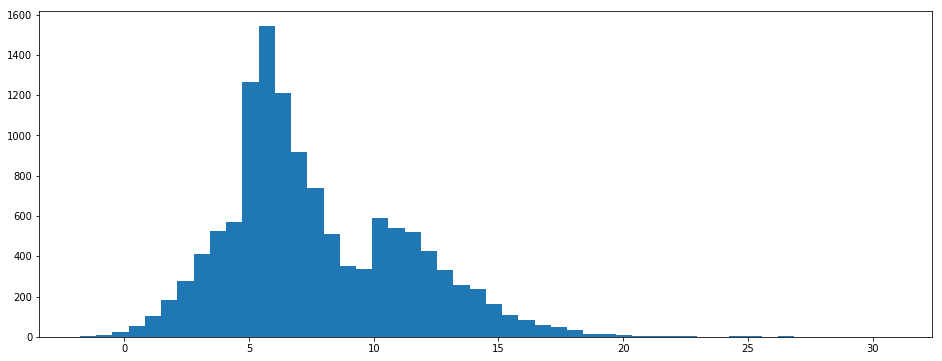

In [4]:
data = np.loadtxt("../data/characterising/dataset.txt")
plt.figure(figsize=(16, 6))
plt.hist(data, bins=50)

The first thing we can do is to get some metrics for center of the distribution

# Measures of centrality
## Mean
If we have a set of points N points denoted $x_i$, the mean is defined as

$$ \frac{1}{N} \sum_{i=1}^N x_i $$

A way to manually compute the mean is given by:

In [5]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed/len(xs)

get_mean([3, 5, 2, 6])

4.0

In [6]:
mean = np.mean(data)
print(mean, np.mean(data), np.average(data))

7.68805056 7.68805056 7.68805056


### Median 
sort all the elements and pick the middle element. Thats the median

In [7]:
def get_median(xs):
    mid = len(xs)//2
    if len(xs)%2==1:
        return sorted(xs)[mid]
    else:
        return 0.5*np.sum(sorted(xs)[mid-1:mid+1])

print(get_median([7, 7, 3, 1, 4, 5]))

4.5


In [8]:
median = np.median(data)
print(median)

6.7325


Also it is good to point out that median can often be more useful than mean as it is less sensitive to outliers.

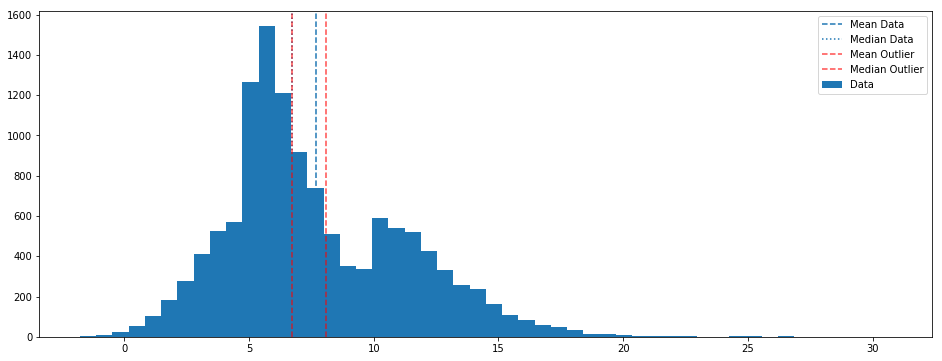

In [10]:
outlier = np.insert(data, 0, 5000)
plt.figure(figsize=(16, 6))
plt.hist(data, label="Data", bins=50)
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c="r", ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c="r", ls="--", label="Median Outlier", alpha=0.7)
plt.legend()

### Mode 
another outlier insensitive method. It returns us the value which is most common. **This works for discreete distributions only**. If you have a continous data you have to bin the data first.

In [13]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]

print(get_mode([1,7,2,5,3,3,8,3,2]))

3


In [15]:
mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


It is not very useful. We got two values ... not very good mode. We should bin the data (make a histogram of it) and return the bin which has the most values in it. But then we have to pick number of bins bin edges etc, etc, we sort of loose the point. 

In [17]:
hist, edges = np.histogram(data, bins=100)
edge_centers = 0.5*(edges[1:]+edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.223165


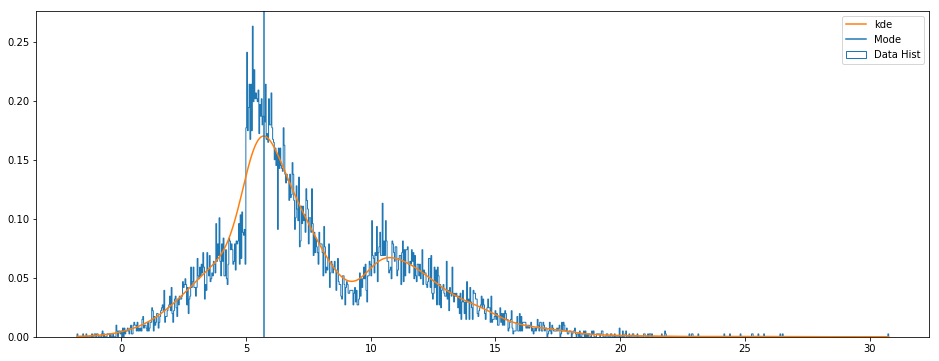

In [20]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.figure(figsize=(16, 6))
plt.hist(data, bins=1000, density=True, label="Data Hist", histtype="step")
plt.plot(xvals, yvals, label="kde")
plt.axvline(mode, label="Mode")
plt.legend()

### Comparision
Here is the comparision for mean, median, mode for the dataset

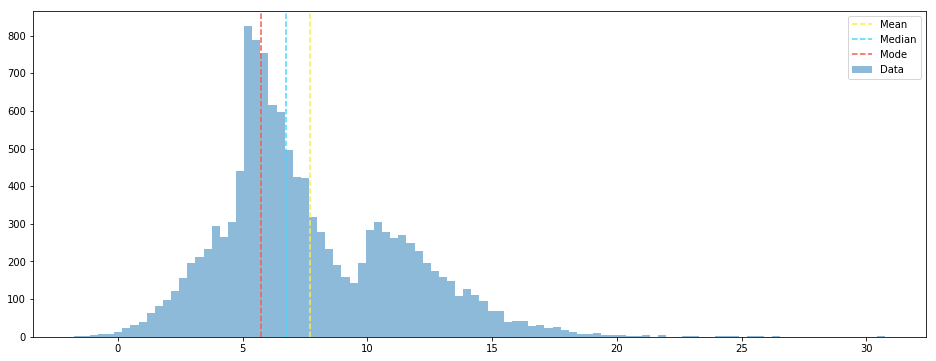

In [22]:
plt.figure(figsize=(16, 6))
plt.hist(data, bins=100, label="Data", alpha=0.5)
plt.axvline(mean, label="Mean", ls="--", c="#f9ee4a")
plt.axvline(median, label="Median", ls="--", c="#44d9ff")
plt.axvline(mode, label="Mode", ls="--", c="#f95b4a")
plt.legend()

# Measures of width and Balance 
* Variance
* Standard Deviation
* variance
* kurtosis

### Variance
The variance of a distribution is a measure of how much it spreads around the mean. A touch more formally, its the expected value of the squared deviation from thee mean. Even more formally it is given by 

$$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2, $$

Where $\mu$ is the mean of the dataset x, as described in previous section. Note there is a fine point about whether you should divide by N or N-1. Here is a manual way of calculating it.

In [24]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x-mean)**2
    return summed/(len(xs) -1)

print(get_variance([1,2,3,4,5]))

2.5


In [25]:
variance = np.var(data, ddof=1)
print(variance)

13.137626632694301


### Standard Deviation
Its the square root of variance. So its the expected absolute value of deviation from the mean. And we can use `np.std` or `pd.DataFrame.std`

In [28]:
std = np.std(data)
print(std, std**2)

3.6244414221454435 13.136575622563685


### Our powers combined
Welcome to the gaussian approximation also known as normal approximation.

Text(0, 0.5, 'Probability')

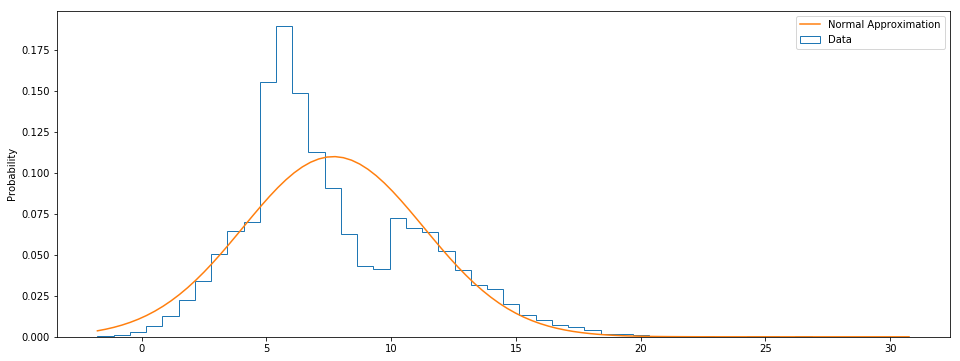

In [30]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)

plt.figure(figsize=(16, 6))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys, label="Normal Approximation")
plt.legend()
plt.ylabel("Probability")

Seems like our data is not perfectly symetrical. Lets quantify how symetrical it is.

### Skewness

In this section we might talk abouth the word "moment". There are some standard ways of quantifying "moments". The first moment is zero by definition. The second is variance. The third is skewness, which is often defined as $\gamma_1$.

$$ \gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}} = \frac{E[(x-\mu)^3]}{E[(x-\mu)^2]^{3/2}} $$

In [31]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0 
    for x in xs:
        summed += (x-mean)**3
    return (summed/(len(xs)))/(var**1.5)

print(get_skewness([1,2,3,4,5]))

0.0


In [32]:
skewness = st.skew(data)
print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


Lets update our normal approximation to a skewed normal approximation and see how it looks, just for fun

Text(0, 0.5, 'Probability')

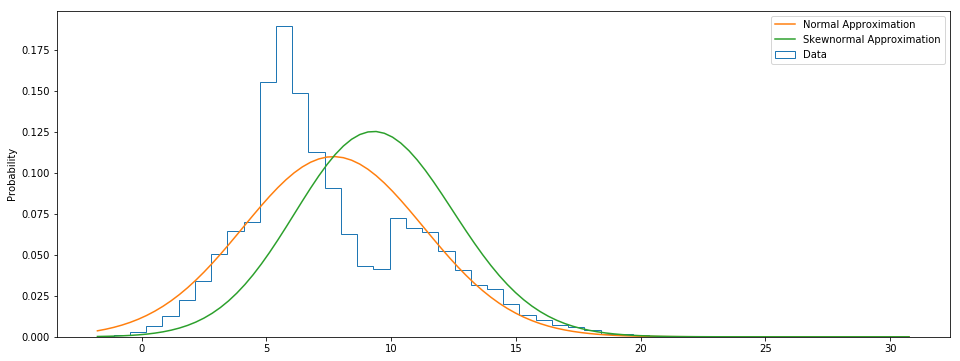

In [33]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.figure(figsize=(16, 6))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal Approximation")
plt.plot(xs, ys2, label="Skewnormal Approximation")
plt.legend()
plt.ylabel("Probability")

ok This dosent look better. Where did we go wrong?
A skew normal cant just be given the mean and standard deviation of a normal and expected to work. The skewness modifies the mean and standard deviation. You need to actually fit.

Text(0, 0.5, 'Probability')

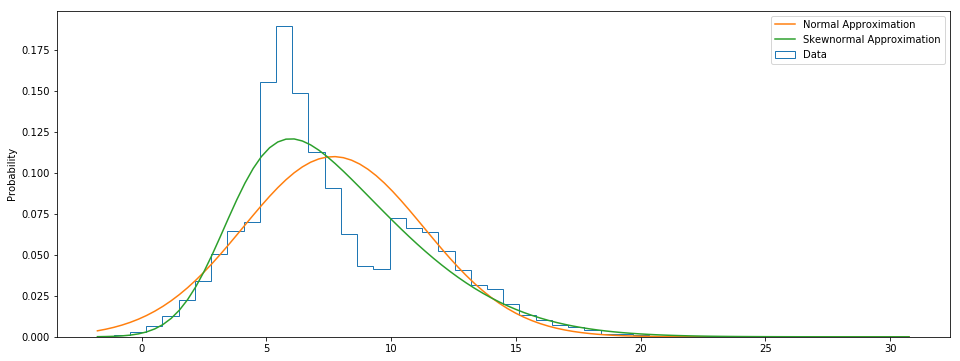

In [34]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.figure(figsize=(16, 6))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal Approximation")
plt.plot(xs, ys2, label="Skewnormal Approximation")
plt.legend()
plt.ylabel("Probability")

### Kutrosis

The next moment and the last one we will consider is kurtosis. It has a similar definition, and is often represented as $\kappa$ or $\gamma_2$:

$$ \kappa = \frac{E[(x-\mu)^4]}{E[(x-\mu)^2]^{4/2}} $$

In [35]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed=0
    for x in xs:
        summed += (x-mean)**4
    return (summed/(len(xs)))/(var**2)

print(get_kurtosis([1,2,3,4,5]))

1.7


In [37]:
kurtosis = st.kurtosis(data, fisher=False)
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


`fisher?`. Its just a way of normalisation thing and because there are multiple definitions of kurtosis. With fisher = False, a normal distribution has a kurtosis of 3. With fisher=3, scipy substracts 3 from the result so that a normal distribution would have a kurtosis of 0. Lots of things are compared to a normal distributions, so having all the moments be 0 for them is handy. If you are curious about this, the difference is between "kurtosis" and "excess kurtosis", will help which will hopefully help when googling!

# When analytics fail

At the moment we have been comming up with ways to quantify our data distributions such that we could try and reconstruct something approximately the same using various analytic distributions, like normal distribution. So what happens if that isnt going to be good enough?

### Percentiles
What if we - instead of using mean or other such numbers - simply turned our long data vector down into a feew points representing percentiles? we could essentially reconstruct out data distribution to an arbitrary accuracy and never wory about analytic functions.


Text(0, 0.5, 'Percentiles')

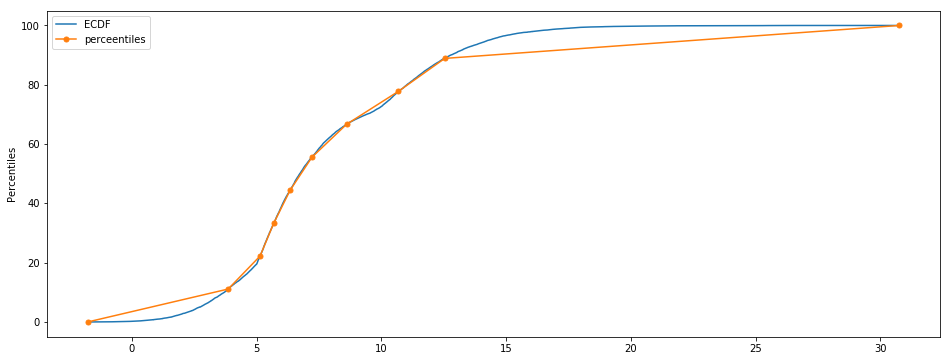

In [38]:
ps = np.linspace(0, 100, 10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.figure(figsize=(16, 6))
plt.plot(xs, ys*100, label="ECDF")
plt.plot(x_p, ps, label="perceentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentiles")

Text(0, 0.5, 'Percentiles')

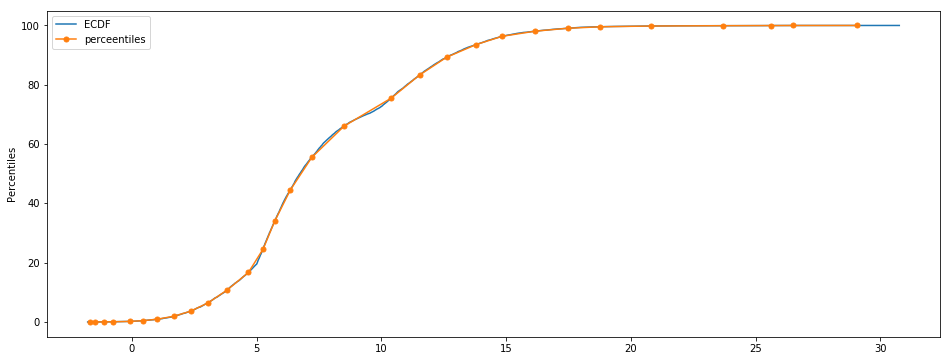

In [39]:
ps = 100*st.norm.cdf(np.linspace(-4, 4, 30))
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.figure(figsize=(16, 6))
plt.plot(xs, ys*100, label="ECDF")
plt.plot(x_p, ps, label="perceentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentiles")

Text(0, 0.5, 'Percentiles')

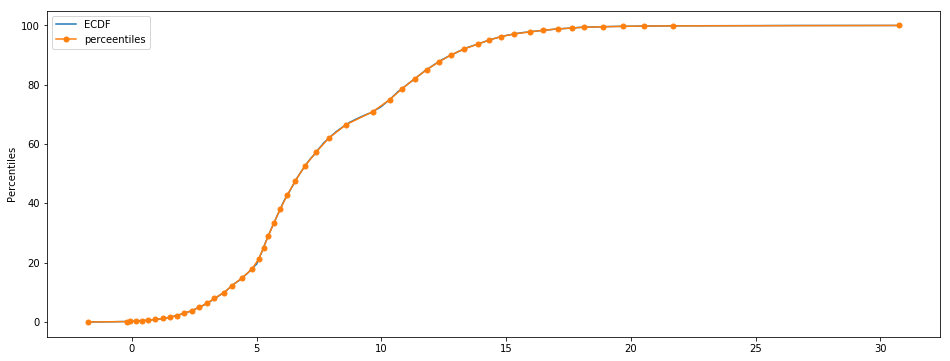

In [42]:
ps = 100*st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.concatenate(([0], ps, [100])) # There is a bug in the insert way of doing it, this is better
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.figure(figsize=(16, 6))
plt.plot(xs, ys*100, label="ECDF")
plt.plot(x_p, ps, label="perceentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentiles")

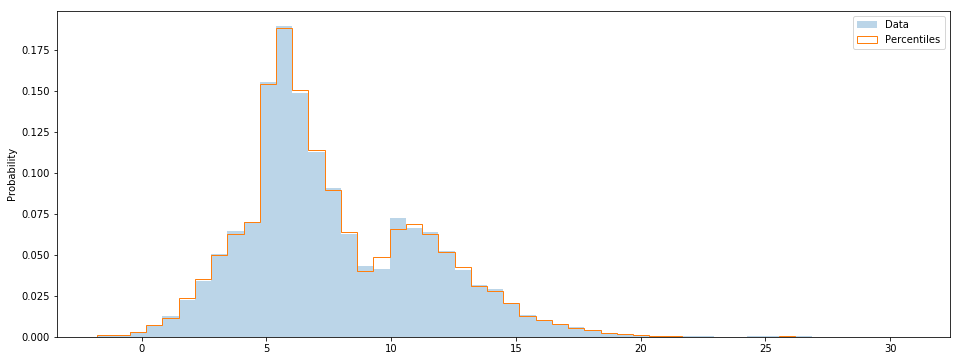

In [44]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)

plt.figure(figsize=(16, 6))
_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label="Data")
plt.hist(samp_percentile_1, bins=bins, density=True, histtype="step", label="Percentiles")
plt.ylabel("Probability")
plt.legend();

Look at how nice those tails are now! and if we increased our samples in our second percentiles to around a hundred and we could very accurately describe our 1D distribution. And 100 datapoints are much faster to transfer than 1000s of them